## ANN Binary Classification


In [1]:
# Imports
import numpy as np

import torch
import torch.nn as nn

# Pytorch Gpu Configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.set_default_device(device)

import matplotlib.pyplot as plt

# Matplotlib svg plots for better pictures
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

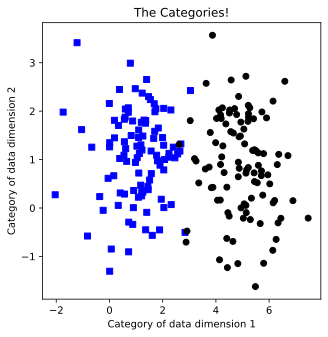

In [ ]:
# Create the data
nPerCluster = 100
blur = 1  # Std Deviation of 1

A = [1, 1]
B = [5, 1]

# Generate the data
a = [
    A[0] + np.random.randn(nPerCluster) * blur,
    A[1] + np.random.randn(nPerCluster) * blur,
]
b = [
    B[0] + np.random.randn(nPerCluster) * blur,
    B[1] + np.random.randn(nPerCluster) * blur,
]

# True labels
labels_np = np.vstack((np.zeros((nPerCluster, 1)), np.ones((nPerCluster, 1))))

# Stack it into a matrix
data_np = np.hstack((a, b)).T

# Convert np matrix into a tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# Plot the data
fig = plt.figure(figsize=(5, 5))
plt.plot(
    data[np.where(labels.cpu() == 0)[0], 0].cpu(),
    data[np.where(labels.cpu() == 0)[0], 1].cpu(),
    "bs",
)
plt.plot(
    data[np.where(labels.cpu() == 1)[0], 0].cpu(),
    data[np.where(labels.cpu() == 1)[0], 1].cpu(),
    "ko",
)
plt.title("The Categories!")
plt.xlabel("Category of data dimension 1")
plt.ylabel("Category of data dimension 2")
plt.show()

In [ ]:
# Model
ANN_classify = nn.Sequential(nn.Linear(2, 1), nn.ReLU(), nn.Linear(1, 1), nn.Sigmoid())

ANN_classify

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
  (3): Sigmoid()
)

In [ ]:
# Model Features
lr = 0.01

# Loss Function
loss_fun = (
    nn.BCELoss()
)  # For Classification we use Binarry cross entropy or BCEWithLogitsLoss( This inclues sigmoid internall)

# Optimizer
optimizer = torch.optim.SGD(ANN_classify.parameters(), lr=lr)